In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model 
from matplotlib import pyplot as plt


In [2]:
df=pd.read_csv('salarydata.csv')
df


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
df.head(3)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731


In [4]:
#x=df.YearsExperience
x=df[['YearsExperience']]
x.shape


(30, 1)

In [5]:
#y=df.Salary
y=df["Salary"]
y.shape

(30,)

<function matplotlib.pyplot.show(close=None, block=None)>

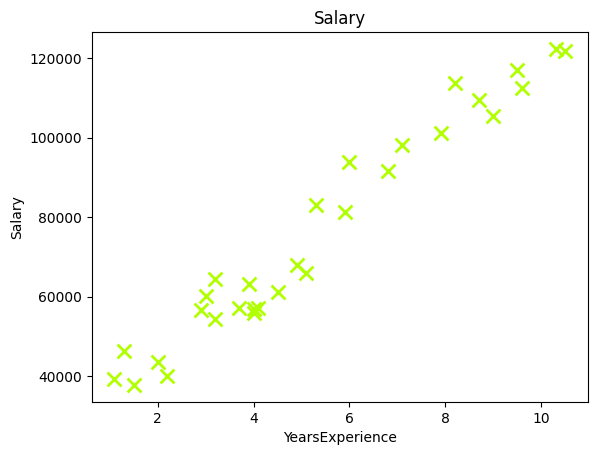

In [6]:
plt.title("Salary")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

plt.scatter(x,y,color='#b2ff02',s=100,marker='x',linewidths=2)
plt.show

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)

In [9]:
X_train.shape,X_test.shape,y_train.shape

((21, 1), (9, 1), (21,))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
X_train=scaler.fit_transform(X_train)
X_train


array([[-1.36666691],
       [-0.96398827],
       [ 0.09761906],
       [-0.70773822],
       [-0.26845243],
       [-0.30505958],
       [ 1.12261925],
       [-1.29345261],
       [-1.22023831],
       [ 1.52529789],
       [-1.03720256],
       [ 0.82976205],
       [ 1.70833364],
       [ 0.39047626],
       [ 2.07440513],
       [ 0.7199406 ],
       [-0.59791677],
       [-0.34166673],
       [-0.12202383],
       [ 0.42708341],
       [-0.67113107]])

In [12]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.74494079],
       [ 0.02440477],
       [ 1.23244069],
       [ 0.17083336],
       [-0.59791677],
       [-0.41488103],
       [ 2.00119083],
       [ 1.41547644],
       [-0.30505958]])

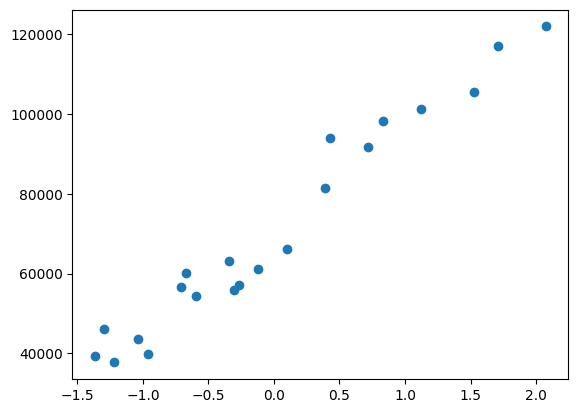

In [13]:
plt.scatter(X_train,y_train)

In [14]:
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [15]:
reg.intercept_

np.float64(71057.33333333333)

In [16]:
reg.coef_

array([25511.6333602])

In [17]:
y_pred_test=reg.predict(X_test)

In [18]:
y_test

27    112635
15     67938
23    113812
17     83088
8      64445
9      57189
28    122391
24    109431
12     56957
Name: Salary, dtype: int64

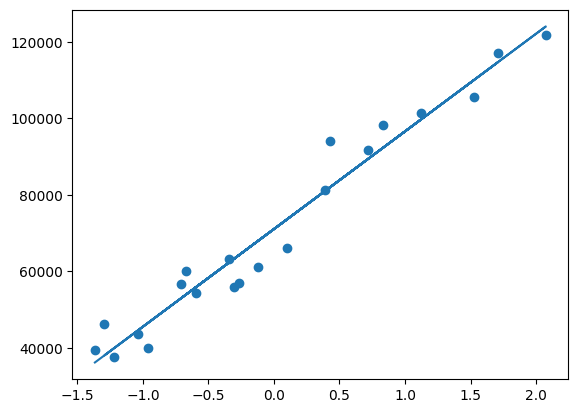

In [19]:
plt.plot(X_train,reg.predict(X_train))
plt.scatter(X_train,y_train)

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

37784662.46621313
5161.32871040018
6146.923007994579


In [21]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

0.9414466227178214

In [22]:
##adjusted r2
adj=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj

0.9330818545346531

In [23]:
d=pd.read_csv("salary.csv")
d

,YearsExperience
0,12.0
1,13.0
2,15.5
3,19.0
4,20.2
5,18.0
6,22.7
7,24.9
8,26.0


In [24]:
p=reg.predict(d)
p


C:\Users\eraru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([377196.93365569, 402708.56701588, 466487.65041637, 555778.36717706,
       586392.3272093 , 530266.73381687, 650171.41060979, 706297.00400222,
       734359.80069844])

In [25]:
reg.predict(d[['YearsExperience']])

C:\Users\eraru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([377196.93365569, 402708.56701588, 466487.65041637, 555778.36717706,
       586392.3272093 , 530266.73381687, 650171.41060979, 706297.00400222,
       734359.80069844])

In [26]:
d['salary']=p;
d.to_csv('salaryvsexp.csv',index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

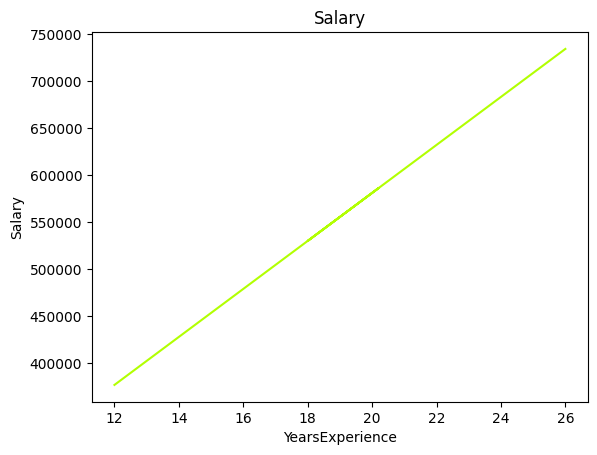

In [27]:
plt.title("Salary")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

plt.plot(d.YearsExperience, p, color='#b2ff02')
plt.show

In [28]:
import pickle
pickle.dump(reg,open('linearreg.pkl','wb'))

In [29]:
model=pickle.load(open('linearreg.pkl','rb'))
model.predict(d[['YearsExperience']])

C:\Users\eraru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([377196.93365569, 402708.56701588, 466487.65041637, 555778.36717706,
       586392.3272093 , 530266.73381687, 650171.41060979, 706297.00400222,
       734359.80069844])